# Exploration 1. 인공지능과 가위바위보 하기

## 1-7. 프로젝트: 가위바위보 분류기 만들기

### 데이터를 준비하자
---
#### 데이터 만들기
링크 : https://teachablemachine.withgoogle.com/   
이미지 촬영 후 각 폴더에 저장   
/home/aiffel/rock_scissor_paper/scissor   
/home/aiffel/rock_scissor_paper/rock   
/home/aiffel/rock_scissor_paper/paper   

**Q8. 다운로드 받은 이미지의 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요.**   
A8. 224x224

#### 데이터 불러오기 + Resize 하기

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow

In [2]:
from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import matplotlib.pyplot as plt

#### 가위 이미지 사이즈 변경

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


#### 바위 이미지 사이즈 변경

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


#### 보 이미지 사이즈 변경

In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


#### load_data() 함수
가위: 0, 바위: 1, 보: 2 로 라벨링

In [6]:
def load_data(img_path):
    
    # 가위: 0, 바위: 1, 보: 2
    number_of_data = 300    # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size = 28
    color = 3
    
    # 이미지 데이터와 라벨(가위: 0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    
    # 가위
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0    # 가위: 0
        idx = idx + 1

    # 바위
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1    # 바위: 1
        idx = idx + 1       
    
    # 보
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2    # 보: 2
        idx = idx + 1
        
    # print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    print("load된 이미지 개수는 ", idx, " 입니다.")
    return imgs, labels

#### 나의 테스트용 이미지를 불러온다.

In [8]:
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)

# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

load된 이미지 개수는  300  입니다.
x_train_norm shape: (300, 28, 28, 3)
y_train shape: (300,)


### 딥러닝 네트워크 설계하기
#### Sequential Model
텐서플로우 케라스(tf.keras)에서 Sequential API을 사용.
- Sequential API: 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법.

In [29]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (28,28,3)))    # 3개의 채널
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    # 3개의 클래스

print('Model에 추가된 Layer 개수: ', len(model.layers))

# 딥러닝 네트워크 모델 확인
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_11 (Dense)             (

- Conv2D 레이어의 첫 번째 인자: 사용하는 이미지의 특징 수.
- Dense 레이어
    - 첫 번째 인자: 분류기에 사용되는 뉴런의 숫자.
    - 뉴런 숫자: 결과적으로 분류해내야 하는 클래스 수.

### 딥러닝 네트워크 학습시키기
- epochs: 전체 데이터를 학습시킬 반복횟수

In [30]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=40)

Epoch 1/40
10/10 [==============================] - 0s 2ms/step - loss: 1.0914 - accuracy: 0.4167
Epoch 2/40
10/10 [==============================] - 0s 2ms/step - loss: 1.0583 - accuracy: 0.3700
Epoch 3/40
10/10 [==============================] - 0s 2ms/step - loss: 1.0106 - accuracy: 0.7400
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.6567
Epoch 5/40
10/10 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.7367
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.7700
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7400
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7800
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.8400
Epoch 10/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8467
Epoch 11/40
10/10 [

### 얼마나 잘 만들었는지 확인하기(테스트)
#### 이혜성 님의 이미지를 받아 테스트용 데이터 만들기

In [31]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
test1_image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/test1"
(x_test1, y_test1) = load_data(test1_image_dir_path)
x_test1_norm = x_test1/255.0    # 입력은 0~1 사이의 값으로 정규화

print("y_test1 shape: {}".format(y_test1.shape))

load된 이미지 개수는  300  입니다.
y_test1 shape: (300,)


#### 테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 본다.

In [34]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test1_loss, test1_accuracy = model.evaluate(x_test1_norm, y_test1, verbose=2)
print("test1_loss: {} ".format(test1_loss))
print("test1_accuracy: {}".format(test1_accuracy))

10/10 - 0s - loss: 2.6908 - accuracy: 0.3900
test1_loss: 2.690828800201416 
test1_accuracy: 0.38999998569488525


**38%** 정도의 정확도가 측정되었다.   
실제로 추론한 확률분포를 출력해보고 추론해낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해보자.

예측확률분포: [0.00177379 0.2769143  0.7213119 ]
라벨: 0, 예측결과: 2


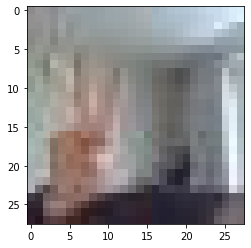

예측확률분포: [0.0723102  0.00136119 0.92632866]
라벨: 1, 예측결과: 2


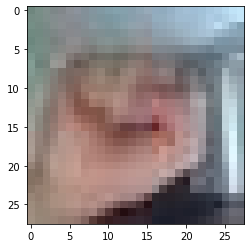

예측확률분포: [4.2200804e-04 9.9779153e-01 1.7865043e-03]
라벨: 2, 예측결과: 1


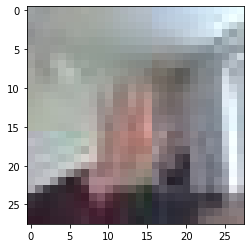

예측확률분포: [0.29775903 0.41932607 0.2829149 ]
라벨: 0, 예측결과: 1


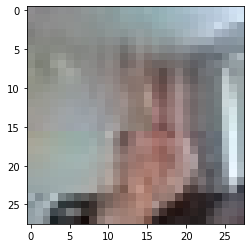

예측확률분포: [0.00163286 0.9930355  0.00533172]
라벨: 0, 예측결과: 1


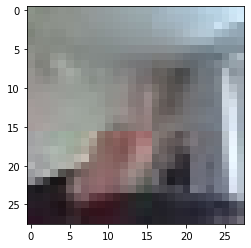

In [35]:
predicted_result = model.predict(x_test1_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test1[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test1[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test1[n], cmap=plt.cm.binary)
    plt.show()

### 더 좋은 네트워크 만들어보기

In [36]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test1_loss, test1_accuracy = model.evaluate(x_test1_norm, y_test1, verbose=2)
print("test1_loss: {} ".format(test1_loss))
print("test1_accuracy: {}".format(test1_accuracy))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

**43%**의 정확도가 측정되었다.

### 다른 조원의 데이터도 테스트해보자 (최지효 님의 이미지)
#### 이미지 리사이즈

In [20]:
# 각 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
test_scissor_path = os.getenv("HOME") + "/rock_scissor_paper/test2/scissor"
test_rock_path = os.getenv("HOME") + "/rock_scissor_paper/test2/rock"
test_paper_path = os.getenv("HOME") + "/rock_scissor_paper/test2/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)

# 가위
images = glob.glob(test_scissor_path+"/*.jpg")  
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# 바위
images = glob.glob(test_rock_path+"/*.jpg")  
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
    # 가위
images = glob.glob(test_paper_path+"/*.jpg")  
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")

#### 이미지 로드

In [21]:
test2_image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/test2"
(x_test2, y_test2) = load_data(test2_image_dir_path)

# 입력은 0~1 사이의 값으로 정규화
x_test2_norm = x_test2/255.0

print("x_test2_norm shape: {}".format(x_test2_norm.shape))
print("y_test2 shape: {}".format(y_test2.shape))

load된 이미지 개수는  300  입니다.
x_test2_norm shape: (300, 28, 28, 3)
y_test2 shape: (300,)


#### 정확도 측정

In [37]:
test2_loss, test2_accuracy = model.evaluate(x_test2_norm, y_test2, verbose=2)
print("test2_loss: {} ".format(test2_loss))
print("test2_accuracy: {}".format(test2_accuracy))

10/10 - 0s - loss: 2.1579 - accuracy: 0.6367
test2_loss: 2.1579034328460693 
test2_accuracy: 0.6366666555404663


**63%** 정도의 정확도가 나왔다.

예측확률분포: [0.00309231 0.02995377 0.966954  ]
라벨: 1, 예측결과: 2


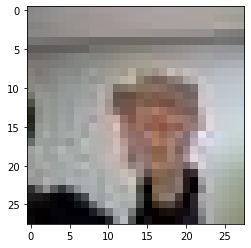

예측확률분포: [9.3991882e-01 6.7919376e-10 6.0081240e-02]
라벨: 2, 예측결과: 0


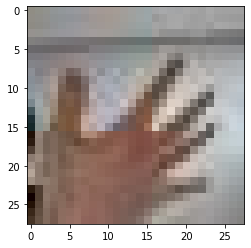

예측확률분포: [9.9997103e-01 7.8973579e-07 2.8160643e-05]
라벨: 2, 예측결과: 0


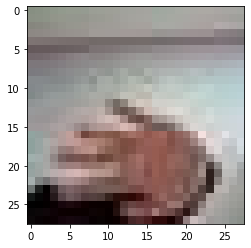

예측확률분포: [9.972730e-01 2.703593e-03 2.339148e-05]
라벨: 1, 예측결과: 0


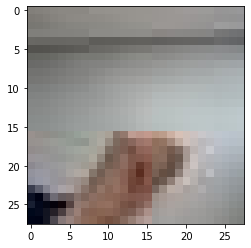

예측확률분포: [0.6253492 0.3708655 0.0037853]
라벨: 1, 예측결과: 0


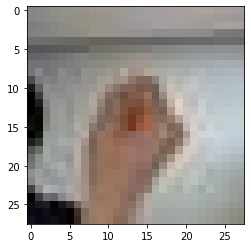

In [38]:
predicted_result = model.predict(x_test2_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test2[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test2[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test2[n], cmap=plt.cm.binary)
    plt.show()

#### 하이파라미터를 다시 원래대로 바꿔 테스트를 해보자.

In [39]:
# 하이퍼파라미터
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test2_loss, test2_accuracy = model.evaluate(x_test2_norm, y_test2, verbose=2)
print("test2_loss: {} ".format(test2_loss))
print("test2_accuracy: {}".format(test2_accuracy))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

**63%** 정도의 정확도로 크게 변화가 없다.

### 다른 사람들의 사진을 모아 3,000장의 학습데이터를 모아 다시 시도해보자.

#### 이미지를 다시 불러온다.
##### load_data() 의 number_of_data 를 3,000으로 수정하여 다시 선언

In [41]:
def load_data(img_path):
    
    # 가위: 0, 바위: 1, 보: 2
    number_of_data = 3000    # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size = 28
    color = 3
    
    # 이미지 데이터와 라벨(가위: 0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    
    # 가위
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0    # 가위: 0
        idx = idx + 1

    # 바위
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1    # 바위: 1
        idx = idx + 1       
    
    # 보
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2    # 보: 2
        idx = idx + 1
        
    # print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    print("load된 이미지 개수는 ", idx, " 입니다.")
    return imgs, labels

In [44]:
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)

# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

load된 이미지 개수는  3000  입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


#### 딥러닝 네트워크 재설정

In [51]:
# 하이퍼파라미터
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

In [52]:
# test1 모델 시험
test1_loss, test1_accuracy = model.evaluate(x_test1_norm, y_test1, verbose=2)
print("test1_loss: {} ".format(test1_loss))
print("test1_accuracy: {}".format(test1_accuracy))

10/10 - 0s - loss: 1.8834 - accuracy: 0.5800
test1_loss: 1.8833768367767334 
test1_accuracy: 0.5799999833106995


In [53]:
# test2 모델 시험
test2_loss, test2_accuracy = model.evaluate(x_test2_norm, y_test2, verbose=2)
print("test2_loss: {} ".format(test2_loss))
print("test2_accuracy: {}".format(test2_accuracy))

10/10 - 0s - loss: 1.7006 - accuracy: 0.6767
test2_loss: 1.7006479501724243 
test2_accuracy: 0.6766666769981384


### test1 에서의 정확도 향상
test1: 정확도가 크게 상승한 모습을 보여준다.  
test2: 크게 차이를 보이지 않았다.   
### 하이퍼파라미터를 수정 후 다시 한 번 측정해보자.

In [54]:
# 하이퍼파라미터
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [55]:
# test1 모델 시험
test1_loss, test1_accuracy = model.evaluate(x_test1_norm, y_test1, verbose=2)
print("test1_loss: {} ".format(test1_loss))
print("test1_accuracy: {}".format(test1_accuracy))

10/10 - 0s - loss: 9.7547 - accuracy: 0.3700
test1_loss: 9.754720687866211 
test1_accuracy: 0.3700000047683716


In [56]:
# test2 모델 시험
test2_loss, test2_accuracy = model.evaluate(x_test2_norm, y_test2, verbose=2)
print("test2_loss: {} ".format(test2_loss))
print("test2_accuracy: {}".format(test2_accuracy))

10/10 - 0s - loss: 1.3436 - accuracy: 0.7700
test2_loss: 1.343595027923584 
test2_accuracy: 0.7699999809265137


### test 별로 상이한 결과를 보임
하이퍼파라미터를 조정하니 test1은 오히려 정확도가 떨어지고 test2는 정확도가 향상한 것을 볼 수 있다.

# 회고
처음에는 어떤 점이 중요한 지 몰라 훈련용 이미지를 대충 찍었더니 몇 가지 문제점이 발생했다.   

1. 배경의 얼룩덜룩한 이미지가 섞여 퀄리티가 떨어졌다.
2. 화면에 손이 가득차게 찍지 않을 경우, 이미지 픽셀을 28x28로 줄이니 손이 표현하는 것을 알아보기 힘들다.
3. 거기다 배경까지 나오는 경우 배경과 손이 섞여 더욱 알아보기 힘든 자료가 된다.  

위와 같은 문제가 발생하는데다 이미지의 갯수도 300장 뿐이라 충분히 훈련할 수 없겠다고 생각하게 되었다.  

훈련용 이미지를 최대한 깨끗한 배경에서 손 모양이 화면 가득차게, 다양한 각도로 촬영해 다시 훈련하니 확실히 이전보다 좋은 결과를 얻을 수 있었다. 하지만 테스트용 이미지가 이전과 같은 문제를 갖고 있는 경우 큰 효과를 보기 어려운 듯 했다. 하이퍼파라미터를 조정해도 크게 달라지지 않았다.  

후에 다른 사람들의 이미지를 다운 받아 3,000장의 훈련용 이미지를 확보한 후 다시 시도했다. 그랬더니 깔끔한 테스트용 이미지는 크게 차이를 보이지 않았지만 그렇지 못한 이미지는 정확도가 상승했다. 하이퍼파라미터를 조정했을 경우에는 깔끔한 이미지는 정확도 상승, 그렇지 못한 이미지는 오히려 하락했다.   

처음 CS231n 강의를 들을 때, 벌써부터 이렇게 진도가 나가나 싶었고, 가위바위보를 구현해보자는 프로젝트를 받았을 때 역시, 벌써 이걸 할 수 있겠는가 싶었다. 아직 이론적인 부분도 낯설고 파이썬을 이제 막 접하거나 코딩이 익숙하지 않은 이들도 있을텐데. 그래도 lms가 생각보다 친절하게 구현되어 있어 따라 해보기 좋았고, 머신러닝이란 대략 이런 느낌이다 하고 경험할 수 있는 좋은 기회가 된 것 같다. 무엇보다 도움을 많이 받았지만 내 손으로 직접 구현해보았다는 성취감이 무척 좋은 느낌이다. 앞으로도 기대가 된다.